# **Exemplo: Análise de Diferenças Salariais com Base no Gênero**

Você possui um conjunto de dados chamado "wage1" que contém informações sobre salários, experiência, educação e gênero de um grupo de indivíduos. Vamos realizar uma análise para entender como o gênero afeta os salários das pessoas.


In [ ]:
# !pip install wooldridge
import wooldridge as woo

data = woo.data('wage1')

print(data)

      wage  educ  exper  tenure  nonwhite  female  married  numdep  smsa  \
0     3.10    11      2       0         0       1        0       2     1   
1     3.24    12     22       2         0       1        1       3     1   
2     3.00    11      2       0         0       0        0       2     0   
3     6.00     8     44      28         0       0        1       0     1   
4     5.30    12      7       2         0       0        1       1     0   
..     ...   ...    ...     ...       ...     ...      ...     ...   ...   
521  15.00    16     14       2         0       1        1       2     0   
522   2.27    10      2       0         0       1        0       3     0   
523   4.67    15     13      18         0       0        1       3     0   
524  11.56    16      5       1         0       0        1       0     0   
525   3.50    14      5       4         1       1        0       2     0   

     northcen  ...  trcommpu  trade  services  profserv  profocc  clerocc  \
0         

In [ ]:
print(X)

     const  female  educ  exper  tenure
0      1.0       1    11      2       0
1      1.0       1    12     22       2
2      1.0       0    11      2       0
3      1.0       0     8     44      28
4      1.0       0    12      7       2
..     ...     ...   ...    ...     ...
521    1.0       1    16     14       2
522    1.0       1    10      2       0
523    1.0       0    15     13      18
524    1.0       0    16      5       1
525    1.0       1    14      5       4

[526 rows x 5 columns]


In [ ]:
import wooldridge as woo
import pandas as pd
import statsmodels.api as sm

# Carregue o conjunto de dados "wage"
data = woo.data('wage1')

data["female"] = (data['female']).astype(int)

X = data[['female','married', 'educ','exper','tenure']]
X = sm.add_constant(X) #adicionando uma constante aos dados
# X['const'] = 0

y = data['wage']

modelo = sm.OLS(y,X).fit()

print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     60.61
Date:                Wed, 27 Sep 2023   Prob (F-statistic):           1.02e-49
Time:                        23:39:32   Log-Likelihood:                -1312.3
No. Observations:                 526   AIC:                             2637.
Df Residuals:                     520   BIC:                             2662.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6182      0.723     -2.238      0.0

Se feminino então o modelo é
- salário = (-1.56 - 1.81) + 0.57 * Educ + 0.025 * Exper + 0.14 * Tenure

Se masculino então modelo é
- salário = (-1.56) + 0.57 * Educ + 0.025 * Exper + 0.14 * Tenure

**Continunado, agora com casado e mulher com educação**

In [ ]:
data["female_educ"] = data["educ"] * data["female"]
# data["male_educ"] = data["educ"] * (data["female"] == 0).astype(int)

# data[['female','educ',"female_educ"]]

X = data[["married", "female_educ", 'educ','exper','tenure']]
X = sm.add_constant(X)
y = data['wage']

modelo = sm.OLS(y,X).fit()

print(modelo.summary())

# data

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     61.26
Date:                Wed, 27 Sep 2023   Prob (F-statistic):           3.65e-50
Time:                        23:41:39   Log-Likelihood:                -1311.3
No. Observations:                 526   AIC:                             2635.
Df Residuals:                     520   BIC:                             2660.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -2.3210      0.701     -3.313      

Se casado e feminino então o modelo é
- salário = (-2.3 + 0.55) + (0.61 - 0.139) * Educ + 0.019 * Exper + 0.14 * Tenure
- salário = (-2.3 + 0.55) + 0.61 * Educ - 0.139 * (Female_Educ = 1) * Educ + 0.019 * Exper + 0.14 * Tenure

Se casado e masculino então o modelo é
- salário = (-2.3 + 0.55) + 0.61 * Educ + 0.019 * Exper + 0.14 * Tenure

Se solteiro e feminino então modelo é
- salário = -2.3 + (0.61 - 0.139) * Educ + 0.019 * Exper + 0.14 * Tenure

Se solteiro e masculino então modelo é
- salário = -2.3 + 0.61 * Educ + 0.19 * Exper + 0.14 * Tenure

-
-
-
-


- salário = (-2.3 + 0.55) + 0.61 * Educ - 0.139 * (Female_Educ = 1) * Educ + 0.019 * Exper + 0.14 * Tenure


In [ ]:
X = data[['educ','exper','tenure']]
X = sm.add_constant(X)
y = data['wage']

modelo = sm.OLS(y,X).fit()

print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     76.87
Date:                Wed, 27 Sep 2023   Prob (F-statistic):           3.41e-41
Time:                        23:06:13   Log-Likelihood:                -1336.8
No. Observations:                 526   AIC:                             2682.
Df Residuals:                     522   BIC:                             2699.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.8727      0.729     -3.941      0.0

**Exemplo Regressão Logística**

Temos dados relacionados ao tamanho do grão e à presença ou ausência de aranhas. Queremos realizar uma análise para determinar como o tamanho do grão pode influenciar a presença de aranhas.

Optimization terminated successfully.
         Current function value: 0.546992
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             aranha_num   No. Observations:                   28
Model:                          Logit   Df Residuals:                       26
Method:                           MLE   Df Model:                            1
Date:                Mon, 02 Oct 2023   Pseudo R-squ.:                  0.1289
Time:                        22:44:10   Log-Likelihood:                -15.316
converged:                       True   LL-Null:                       -17.582
Covariance Type:            nonrobust   LLR p-value:                   0.03324
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.6476      1.354     -1.217      0.224      -4.302       1.007
grao_size_mm     5.1216

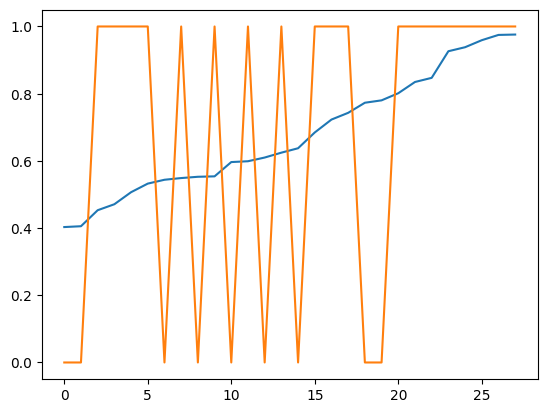

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Dados fornecidos
data = {
    'grao_size_mm': [0.245, 0.247, 0.285, 0.299, 0.327, 0.347, 0.356, 0.36, 0.363, 0.364,
                         0.398, 0.4, 0.409, 0.421, 0.432, 0.473, 0.509, 0.529, 0.561, 0.569,
                         0.594, 0.638, 0.656, 0.816, 0.853, 0.938, 1.036, 1.045],
    'aranha': ['absent', 'absent', 'present', 'present', 'present', 'present', 'absent',
                'present', 'absent', 'present', 'absent', 'present', 'absent', 'present',
                'absent', 'present', 'present', 'present', 'absent', 'absent', 'present',
                'present', 'present', 'present', 'present', 'present', 'present', 'present']
}

# Criar o DataFrame
df = pd.DataFrame(data)

# Exibir o DataFrame
# print(df)

df["aranha_num"] = (df.aranha == "present").astype(int)

X = df.grao_size_mm
X = sm.add_constant(X)
y = df.aranha_num

modelo = sm.Logit(y, X).fit()

print(modelo.summary())

print("Predições")
print(modelo.predict(X))

plt.plot(modelo.predict(X))
plt.plot(y)
plt.show()


In [ ]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
y = data["target"]
# X = data.drop("target", axis = 1)

X = pd.DataFrame(data["data"])
X.columns = data.feature_names

Optimization terminated successfully.
         Current function value: 0.174398
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  569
Model:                          Logit   Df Residuals:                      565
Method:                           MLE   Df Model:                            3
Date:                Mon, 02 Oct 2023   Pseudo R-squ.:                  0.7359
Time:                        22:52:16   Log-Likelihood:                -99.232
converged:                       True   LL-Null:                       -375.72
Covariance Type:            nonrobust   LLR p-value:                1.574e-119
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   9.1890      2.113      4.348      0.000       5.047      13.331
me

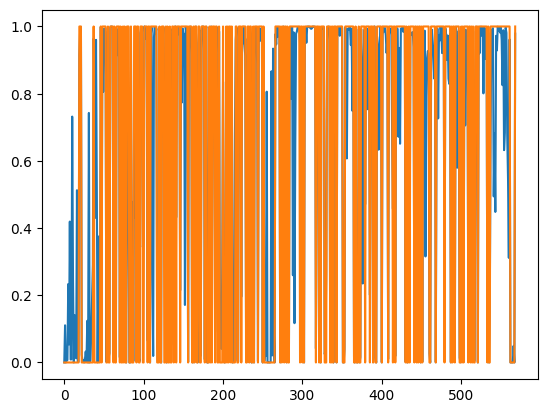

In [ ]:
X_const = sm.add_constant(X[["mean texture","mean smoothness","mean concave points"]])

model = sm.Logit(y, X_const).fit()

print(model.summary())


